# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

#Importing Libraries

In [2]:
#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Suppress Future warnings
import warnings
warnings.filterwarnings('ignore')

#Reading the Dataset

In [3]:
#Define url for stored dataset
url = 'https://drive.google.com/uc?export=download&id=1AW5Gz6IqktDOoIjaBeWvy-HMaF5Y84sX'

#Read the csv file into pandas dataframe
data = pd.read_csv(url)

###Observing raw data visually 

In [4]:
#Getting the first 5 observations
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
#Getting the last 5 observations
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


###Dropping 'id' column

We will drop 'id' column because it is redundant and has high cardinality and does not contribute in any way for prediction.


In [6]:
data.drop(columns='id', inplace=True)

###Data Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


###Descriptive Statistics

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


###Checking for Missing Observations

In [9]:
print('Missing value count with respect to each column:')
data.isna().sum()

Missing value count with respect to each column:


Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

###Identifying continuous and discrete features

Since we do not have a lot of features in the raw dataset, a visual inspections looking at counts of unique values of each features will be enough.

In [10]:
for col in data.columns:
    print(f"{col}: ")
    print("")
    print(data[col].unique())
    print("")

Gender: 

['Male' 'Female']

Age: 

[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License: 

[1 0]

Region_Code: 

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured: 

[0 1]

Vehicle_Age: 

['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage: 

['Yes' 'No']

Annual_Premium: 

[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel: 

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54

###Defining Continuous and Discrete Features

In [11]:
discrete_features = [i for i in data.columns if data[i].nunique() <= 3]

print('Discrete Features: ', discrete_features)

continuous_features = [i for i in data.columns if i not in discrete_features]

print('Continuous Features: ', continuous_features)

Discrete Features:  ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
Continuous Features:  ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


###**Observations**

* Our original Dataset contains 381109 rows and 12 columns.
* There are 5 numerical and 5 catagorical features present in our dataset.
* Our target variable ('Response') is catagorical and dichotomous, hence this is a **Binary Classification** problem.
* There are no **Null** values present in our dataset.

#EDA, Data Cleaning and Manipulation

##Handling Outliers

###Checking for outliers

We can use distplots and boxplots to visualize distribution and find outliers in the features

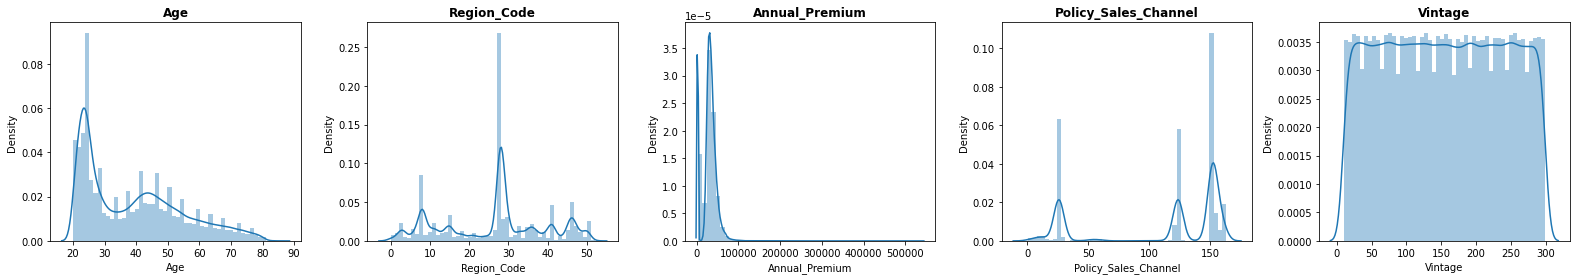

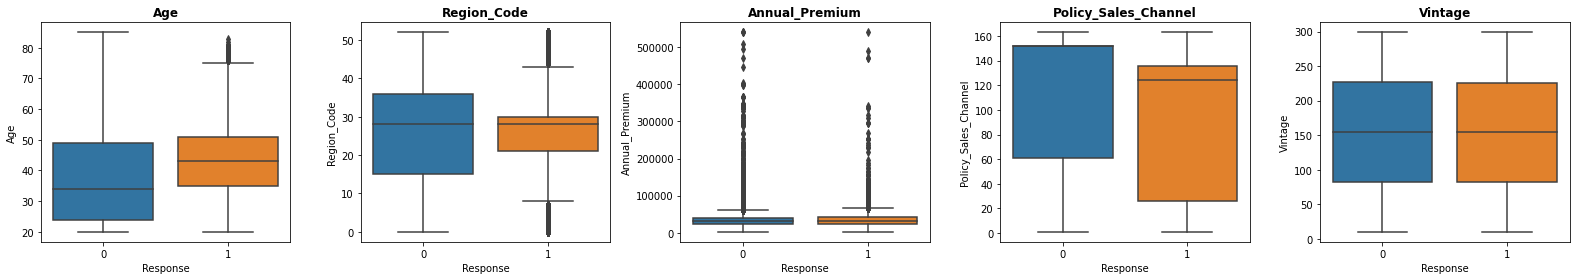

In [12]:
# Plotting Distributions
plt.figure(figsize=(22,4))
for n,column in enumerate(continuous_features):
  plt.subplot(1, 5, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

#Boxplots for detecting outliers
plt.figure(figsize=(22,4))
for n,column in enumerate(continuous_features):
  plt.subplot(1, 5, n+1)
  sns.boxplot(x=data['Response'], y=data[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

####Observations:
* **Annual_Premium** appears to contain a large number of outliers and is positively skewed.
* Other features do not seem to contain a lot of outliers.
* **Age** is a little skewed toward right but we do not need to treat them.

###Treating Outliers

We will be using quantile method to treat outliers in 

In [13]:
#Defining Median, Q1 and Q3 for 'Annual_Premium' column
q1, q3, median = data['Annual_Premium'].quantile([0.25,0.75,0.5])

#Finding upper and lower limits
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)

#Applying quantiles to Annual_Premium feature to treat outliers
data['Annual_Premium'] = np.where(data['Annual_Premium'] > upper_limit, median,np.where(
                            data['Annual_Premium'] < lower_limit,median,data['Annual_Premium']))

Text(0.5, 1.0, 'Annual_Premium')

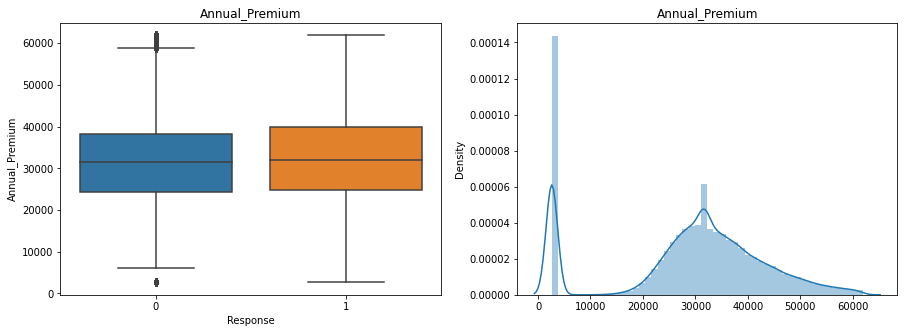

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(ax = axes[0], x=data['Response'], y=data['Annual_Premium']).set_title('Annual_Premium')
sns.distplot(ax = axes[1], x=data['Annual_Premium']).set_title('Annual_Premium')

####Observations:
* **Annual_Premium** no longer contains outliers

##Univariate Analysis

###Target variable

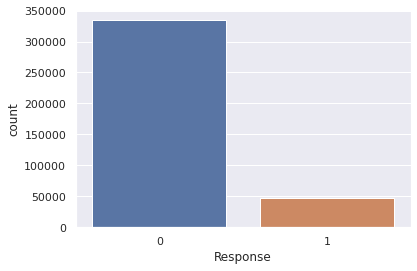

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(data['Response'])

###Categorical Features

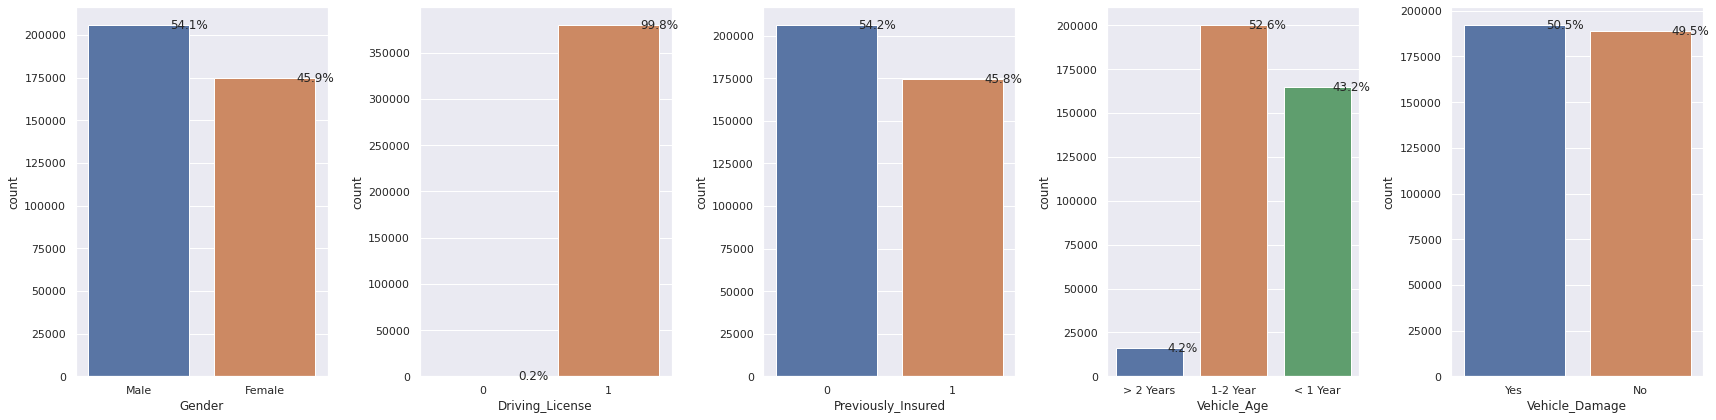

In [16]:
plt.figure(figsize=(24,6))
for n,column in enumerate(discrete_features[:-1]):
  plt.subplot(1, 5, n+1)
  sns.set_theme(style="darkgrid")
  ax = sns.countplot(data[column])

  total = float(len(data))
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
  plt.tight_layout()

###Numeric Features

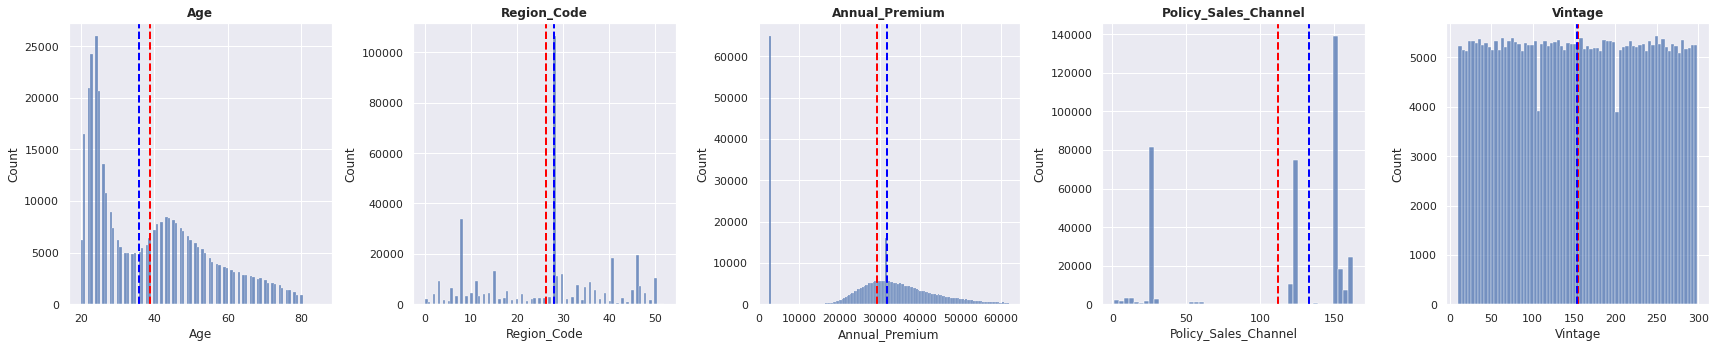

In [17]:
plt.figure(figsize=(24,5))
for n,column in enumerate(continuous_features):
  feature = data[column]
  ax=plt.subplot(1, 5, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

####Observations:
* Target Variable **Response** contains mostly 0(Not interested) values in the data. Since there is a class imbalance, we should handle it using some suitable technique.


* **Gender** column suggests that number of Male customers is higher than Female customers.
* Almost all of the customers posess a driving license. 
* About half the customers have been previously insured.
* Vechles with age 1-2 years are prevalant in our data.
* Almost half the vehicles have already suffered some

 


##Bivariate Analysis

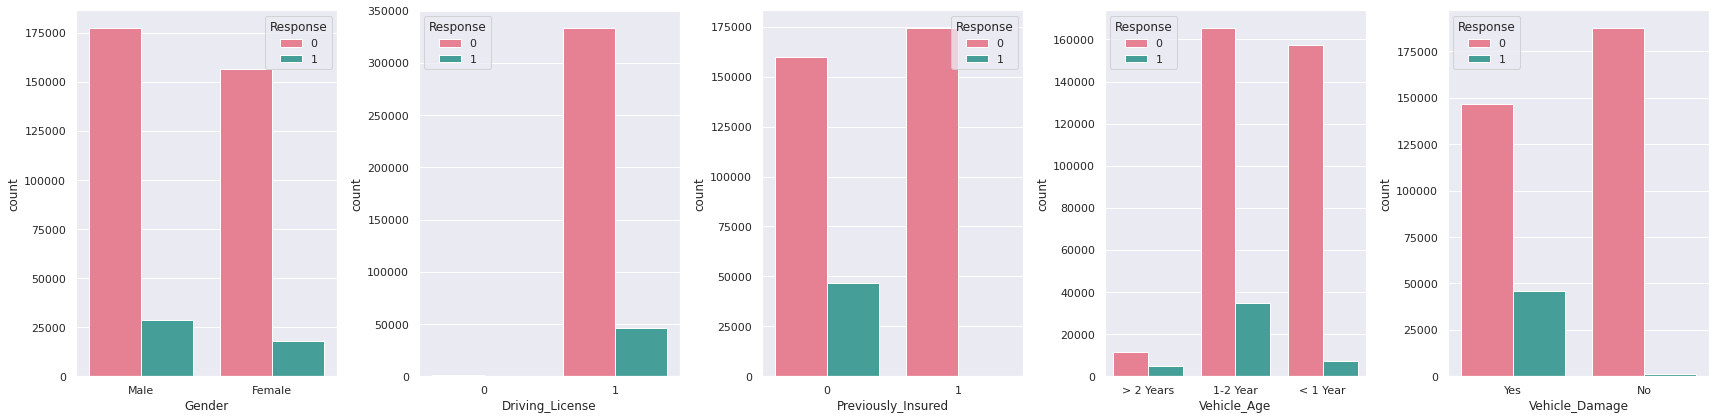

In [18]:
#Plotting Countplots for categorical features with respect to the target variables
plt.figure(figsize=(24,6))
for n,column in enumerate(discrete_features[:-1]):
  plt.subplot(1, 5, n+1)
  sns.set_theme(style="darkgrid")
  ax = sns.countplot(x=data[column], hue=data['Response'], palette='husl')
  plt.tight_layout()

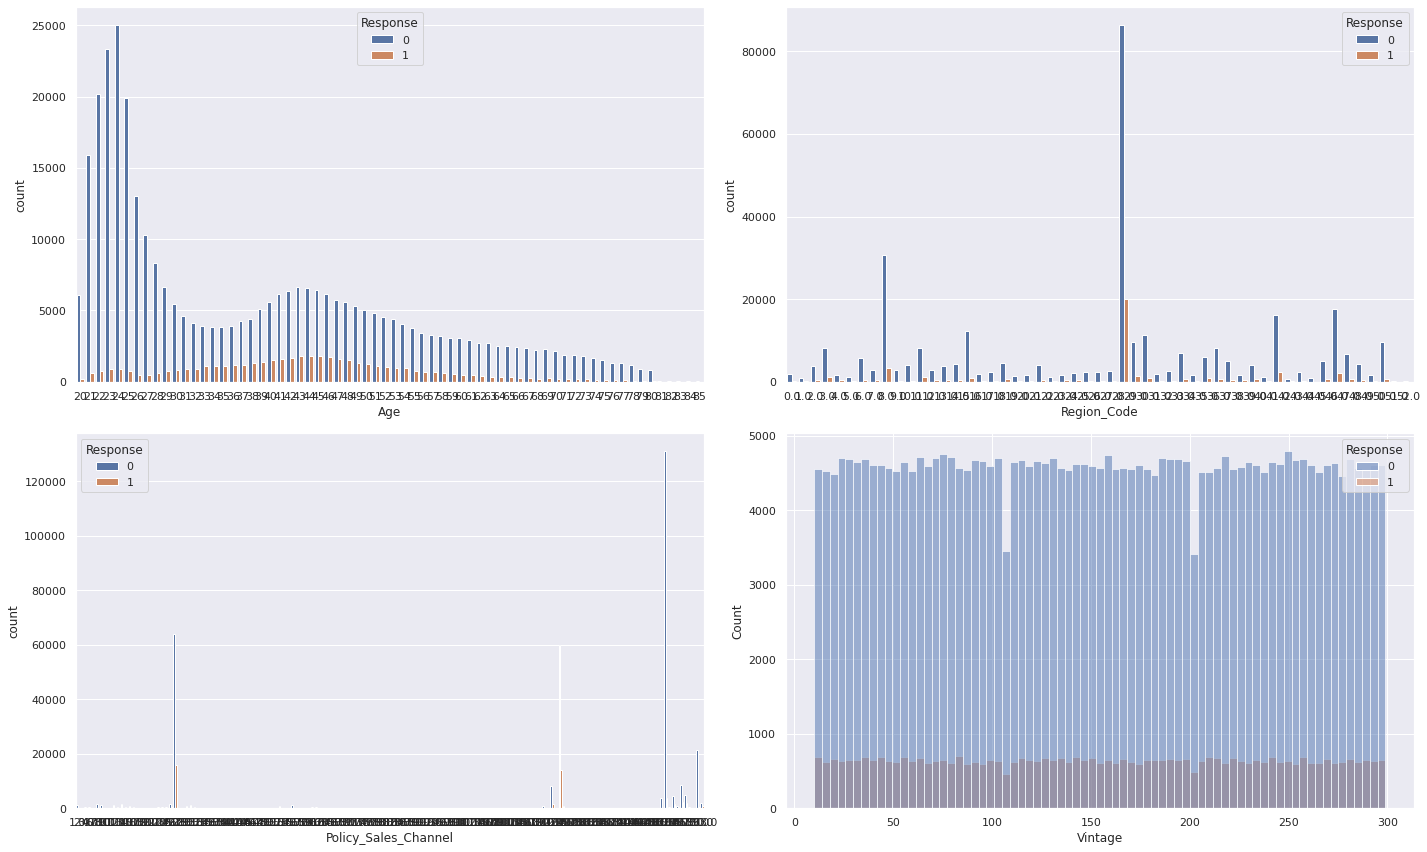

In [31]:
#Plotting distributions for numeric features with respect to the target variables

#Define subplots and axes
fig, axes = plt.subplots(2,2, figsize=(28,12))

#Distribution for Age
sns.countplot(ax = axes[0][0],x = 'Age', data = data, hue='Response')

#Distribution for Region_Code
sns.countplot(ax = axes[0][1],x = 'Region_Code', data = data, hue='Response')

#Distribution for Policy_Sales_Channel
sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = data, hue='Response')

#Distribution for Vintage
sns.histplot(ax = axes[1][1], x = data['Vintage'],data = data, hue='Response')

plt.tight_layout()

* There is a huge dispersion of numeric features w.r.t the target variables.
* We can convert some continuous features('Age', 'Region_code', 'Policy_Sales_channel') so that they become categorical.